In [1]:
%pip install chromospyce -q
%pip install pyBigWig -q
import pyBigWig
import chromospyce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


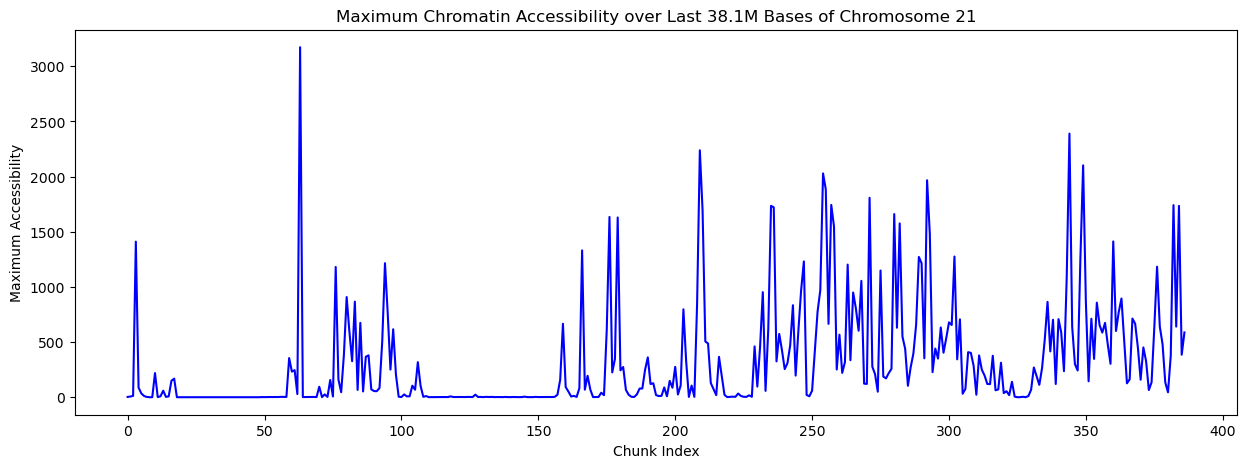

38600000
387
3172.5872
0.00451


Widget(structure=b'\xff\xff\xff\xffx\x03\x00\x00\x10\x00\x00\x00\x00\x00\n\x00\x0e\x00\x06\x00\x05\x00\x08\x00…

In [2]:
# ATAC-seq
# chr 21
bw_atac = pyBigWig.open("atac-seq/ATAC1.bw")


chrom = "chr21"
start = 0
end = bw_atac.chroms(chrom)


start_last = end - 38700000


values_atac = bw_atac.values(chrom, start_last, end, numpy=True)

bw_atac.close()


chunk_size = 100000
max_atac = []
for i in range(0, len(values_atac), chunk_size):
    chunk = values_atac[i:i + chunk_size]
    max = np.nanmax(chunk)
    max_atac.append(max)


max_atac_array = np.array(max_atac)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.arange(len(max_atac_array)), max_atac_array, color='blue')
ax.set_xlabel('Chunk Index')
ax.set_ylabel('Maximum Accessibility')
ax.set_title('Maximum Chromatin Accessibility over Last 38.1M Bases of Chromosome 21')
plt.show()

data = pd.read_parquet('Tan3D.parquet', engine='pyarrow')

chrom21_mat = data[(data['chr']== '21(mat)')]
chrom21_mat_coords1 = chrom21_mat[["x", "y", "z"]].to_numpy()
chrom21_mat_coords = chrom21_mat[["coord"]].to_numpy()

print(np.max(chrom21_mat_coords) - np.min(chrom21_mat_coords))
print(len(chrom21_mat_coords))

chrom21_mat.reset_index(drop=True, inplace=True)
print(np.max(max_atac_array))
print(np.min(max_atac_array))


color_values = max_atac_array.tolist()

vc = {
    "color": {
        "values": color_values,
        "min": np.min(max_atac_array),
        "max": np.max(max_atac_array),
        "colorScale": "YlOrRd"  # Red to yellow to purple (so red and purple are the extreme values)
    },
    "scale": 0.01,
    "links": True,
    "mark": "sphere"
}

chromospyce.Widget(chrom21_mat_coords1, vc)

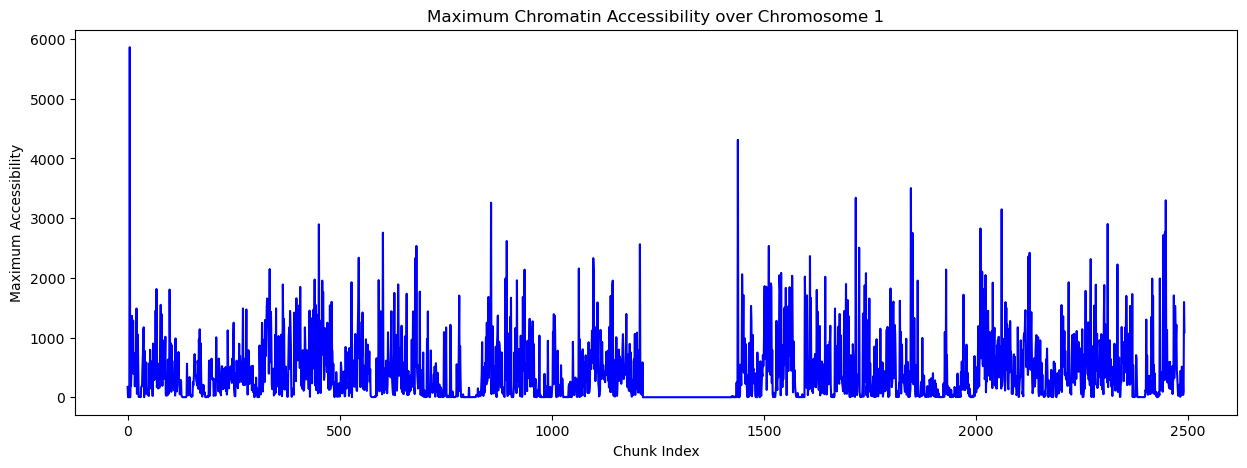

248300000
2484
5864.3403
0.00451


Widget(structure=b'\xff\xff\xff\xffx\x03\x00\x00\x10\x00\x00\x00\x00\x00\n\x00\x0e\x00\x06\x00\x05\x00\x08\x00…

In [3]:
# ATAC-seq
# chr1
bw_atac = pyBigWig.open("atac-seq/ATAC1.bw")

chrom = "chr1"
start = 0
end = bw_atac.chroms(chrom)

# Extract ATAC-seq values for the full length of chromosome 1
values_atac = bw_atac.values(chrom, start, end, numpy=True)

bw_atac.close()

# Process values in chunks to calculate maximum accessibility
chunk_size = 100000
max_atac = []
for i in range(0, len(values_atac), chunk_size):
    chunk = values_atac[i:i + chunk_size]
    max = np.nanmax(chunk)
    max_atac.append(max)

max_atac_array = np.array(max_atac)

# Plot the maximum accessibility values
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.arange(len(max_atac_array)), max_atac_array, color='blue')
ax.set_xlabel('Chunk Index')
ax.set_ylabel('Maximum Accessibility')
ax.set_title('Maximum Chromatin Accessibility over Chromosome 1')
plt.show()

# Read 3D genome data and filter for chromosome 1 maternal coordinates
data = pd.read_parquet('Tan3D.parquet', engine='pyarrow')

chrom1_mat = data[(data['chr'] == '1(pat)')]
chrom1_mat_coords1 = chrom1_mat[["x", "y", "z"]].to_numpy()
chrom1_mat_coords = chrom1_mat[["coord"]].to_numpy()

print(np.max(chrom1_mat_coords) - np.min(chrom1_mat_coords))
print(len(chrom1_mat_coords))

chrom1_mat.reset_index(drop=True, inplace=True)
print(np.max(max_atac_array))
print(np.min(max_atac_array))

# Generate color values for visualization based on accessibility
color_values = max_atac_array.tolist()

vc = {
    "color": {
        "values": color_values,
        "min": np.min(max_atac_array),
        "max": np.max(max_atac_array),
        "colorScale": "YlOrRd"  # Red to yellow to purple (so red and purple are the extreme values)
    },
    "scale": 0.01,
    "links": True,
    "mark": "sphere"
}

# Visualize the chromosome 1 structure with accessibility values
chromospyce.Widget(chrom1_mat_coords1, vc)


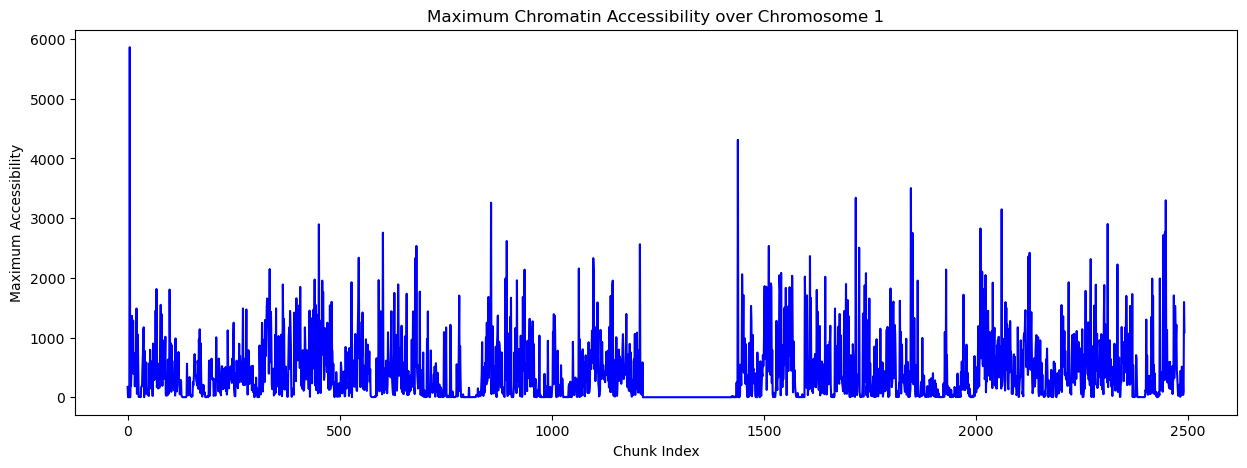

248300000
2484
5864.3403
0.00451
2493
2484


Widget(structure=b'\xff\xff\xff\xffx\x03\x00\x00\x10\x00\x00\x00\x00\x00\n\x00\x0e\x00\x06\x00\x05\x00\x08\x00…

In [4]:
# ATAC-seq
bw_atac = pyBigWig.open("atac-seq/ATAC1.bw")

chrom = "chr1"
start = 0
end = bw_atac.chroms(chrom)

# Extract ATAC-seq values for the full length of chromosome 1
values_atac = bw_atac.values(chrom, start, end, numpy=True)

bw_atac.close()

# Process values in chunks to calculate maximum accessibility
chunk_size = 100000
max_atac = []
for i in range(0, len(values_atac), chunk_size):
    chunk = values_atac[i:i + chunk_size]
    max = np.nanmax(chunk)
    max_atac.append(max)

max_atac_array = np.array(max_atac)

# Plot the maximum accessibility values
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.arange(len(max_atac_array)), max_atac_array, color='blue')
ax.set_xlabel('Chunk Index')
ax.set_ylabel('Maximum Accessibility')
ax.set_title('Maximum Chromatin Accessibility over Chromosome 1')
plt.show()

# Read 3D genome data and filter for chromosome 1 maternal coordinates
data = pd.read_parquet('Tan3D.parquet', engine='pyarrow')

chrom1_mat = data[(data['chr'] == '1(pat)')]
chrom1_mat_coords1 = chrom1_mat[["x", "y", "z"]].to_numpy()
chrom1_mat_coords = chrom1_mat[["coord"]].to_numpy()

print(np.max(chrom1_mat_coords) - np.min(chrom1_mat_coords))
print(len(chrom1_mat_coords))

chrom1_mat.reset_index(drop=True, inplace=True)
print(np.max(max_atac_array))
print(np.min(max_atac_array))

# Generate color values for visualization based on accessibility
color_values = max_atac_array.tolist()

print(len(color_values))
print(len(chrom1_mat_coords1))

vc = {
    "color": {
        "values": color_values,
        "min": np.min(max_atac_array),
        "max": np.max(max_atac_array),
        "colorScale": "YlOrRd"  # Red to yellow to purple (so red and purple are the extreme values)
    },
    "scale": 0.01,
    "links": True,
    "mark": "sphere"
}

# Visualize the chromosome 1 structure with accessibility values
chromospyce.Widget(chrom1_mat_coords1, vc)


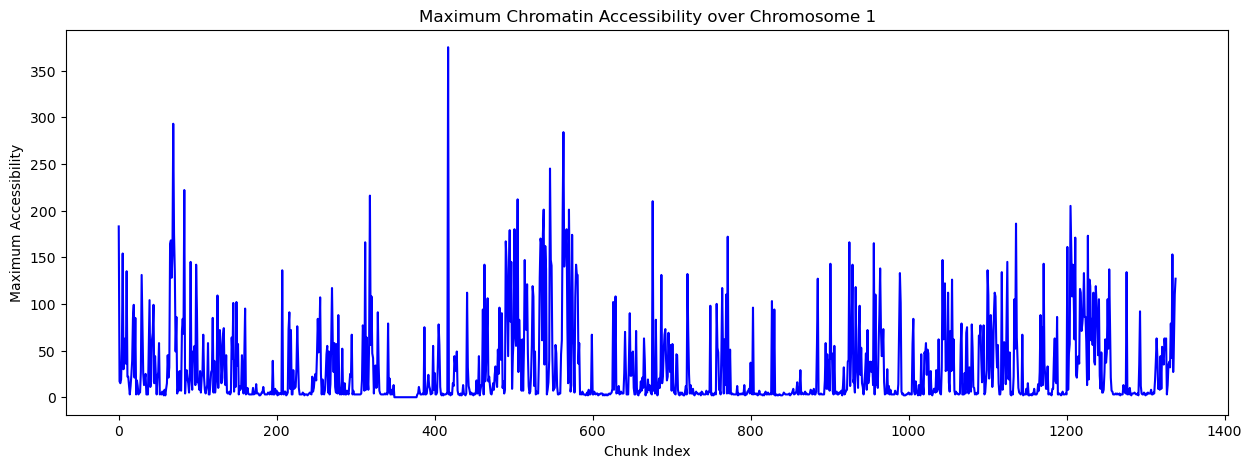

133700000
1338
375.0
0.0
1339
1338


Widget(structure=b'\xff\xff\xff\xffx\x03\x00\x00\x10\x00\x00\x00\x00\x00\n\x00\x0e\x00\x06\x00\x05\x00\x08\x00…

In [5]:
# ATAC-seq
bw_atac = pyBigWig.open("atac-seq/ATACLymph.bw")

chrom = "chr12"
start = 0
end = bw_atac.chroms(chrom)

# Extract ATAC-seq values for the full length of chromosome 1
values_atac = bw_atac.values(chrom, start, end, numpy=True)

bw_atac.close()

# Process values in chunks to calculate maximum accessibility
chunk_size = 100000
max_atac = []
for i in range(0, len(values_atac), chunk_size):
    chunk = values_atac[i:i + chunk_size]
    max = np.nanmax(chunk)
    max_atac.append(max)

max_atac_array = np.array(max_atac)

# Plot the maximum accessibility values
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.arange(len(max_atac_array)), max_atac_array, color='blue')
ax.set_xlabel('Chunk Index')
ax.set_ylabel('Maximum Accessibility')
ax.set_title('Maximum Chromatin Accessibility over Chromosome 1')
plt.show()

# Read 3D genome data and filter for chromosome 1 maternal coordinates
data = pd.read_parquet('Tan3D.parquet', engine='pyarrow')

chrom1_mat = data[(data['chr'] == '12(pat)')]
chrom1_mat_coords1 = chrom1_mat[["x", "y", "z"]].to_numpy()
chrom1_mat_coords = chrom1_mat[["coord"]].to_numpy()

print(np.max(chrom1_mat_coords) - np.min(chrom1_mat_coords))
print(len(chrom1_mat_coords))

chrom1_mat.reset_index(drop=True, inplace=True)
print(np.max(max_atac_array))
print(np.min(max_atac_array))

# Generate color values for visualization based on accessibility
color_values = max_atac_array.tolist()
print(len(color_values))
print(len(chrom1_mat_coords1))

vc = {
    "color": {
        "values": color_values,
        "min": np.min(max_atac_array),
        "max": np.max(max_atac_array),
        "colorScale": "YlOrRd"  # Red to yellow to purple (so red and purple are the extreme values)
    },
    "scale": 0.01,
    "links": True,
    "mark": "sphere"
}

# Visualize the chromosome 1 structure with accessibility values
chromospyce.Widget(chrom1_mat_coords1, vc)
